# Numerical Methods for Pricing Options

In [1]:
import math

import matplotlib.pyplot as plt

from fkit_option import *

## Pricing European Options

In [2]:
r = 0.05
T = 2
t = T / 2
u = 1.2
d = 0.8

q = (math.exp(r * t) - d) / (u - d)
print(f"q = {q}")

q = 0.6281777409400603


In [3]:
eu_option = BinomialEuropeanOption(
    50, 52, r=0.05, T=2, N=2, pu=0.2, pd=0.2, is_put=True
)

print(f"European put option price is: {eu_option.price()}")

European put option price is: 4.1926542806038585


## A Class for American Options Using A Binomial Tree

In [4]:
am_option = BinomialTreeOption(
    50, 52, r=0.05, T=2, N=2, pu=0.2, pd=0.2, is_put=True, is_am=True
)
print(f"American put option price is: {am_option.price()}")

American put option price is: 5.089632474198373


## The Cox-Ross-Rubinstein model

In [5]:
eu_option = BinomialCRROption(50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True)
print(f"European put: {eu_option.price()}")

European put: 6.245708445206436


In [6]:
am_option = BinomialCRROption(
    50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True, is_am=True
)
print(f"American put option price is: {am_option.price()}")

American put option price is: 7.428401902704834


## Using a Leisen-Reimer (LR) Tree

In [7]:
eu_option = BinomialLROption(50, 52, r=0.05, T=2, N=4, sigma=0.3, is_put=True)
print(f"European put: {eu_option.price()}")

European put: 5.878650106601964


In [8]:
am_option = BinomialLROption(
    50, 52, r=0.05, T=2, N=4, sigma=0.3, is_put=True, is_am=True
)
print(f"American put: {am_option.price()}")

American put: 6.763641952939979


## The Greeks For Free

### A Class For Greeks With The Lr Binomial Tree

In [9]:
eu_call = BinomialLRWithGreeks(50, 52, r=0.05, T=2, N=300, sigma=0.3)
results = eu_call.price()
print("European call values")
print(f"Price: {results[0]}\nDelta: {results[1]}\nGamma: {results[2]}")

European call values
Price: 9.69546807138366
Delta: 0.6392477816643529
Gamma: 0.01764795890533088


In [10]:
eu_put = BinomialLRWithGreeks(50, 52, r=0.05, T=2, N=300, sigma=0.3, is_put=True)
results = eu_put.price()
print("European put values")
print(f"Price: {results[0]}\nDelta: {results[1]}\nGamma: {results[2]}")

European put values
Price: 6.747013809252746
Delta: -0.3607522183356649
Gamma: 0.0176479589053312


## Trinomial Trees In Options Pricing

In [11]:
eu_option = TrinomialTreeOption(50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True)
print(f"European put: {eu_option.price()}")

European put: 6.573565269142496


In [12]:
am_option = TrinomialTreeOption(
    50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True, is_am=True
)
print(f"American put: {am_option.price()}")

American put: 7.161349217272585


## Lattices In Options Pricing


### A Class For Crr Binomial Lattice Option Pricing Model

In [13]:
eu_option = BinomialCRRLattice(50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True)
print(f"European put: {eu_option.price()}")

European put: 6.245708445206432


In [14]:
am_option = BinomialCRRLattice(
    50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True, is_am=True
)
print(f"American put: {am_option.price()}")

American put: 7.428401902704828


### Writing The Trinomiallattice Class

In [15]:
eu_option = TrinomialLattice(50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True)
print("European put:", eu_option.price())

European put: 6.573565269142496


In [16]:
am_option = TrinomialLattice(
    50, 52, r=0.05, T=2, N=2, sigma=0.3, is_put=True, is_am=True
)
print(f"American put: {am_option.price()}")

American put: 7.161349217272585


## Finite Differences In Options Pricing

### A Class For Pricing European Options Using Explicit Method Of Finite Differences


In [17]:
option = FDExplicitEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=100, N=1000, is_put=True
)
print(option.price())

4.072882278148043


In [18]:
option = FDExplicitEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=80, N=100, is_put=True
)
print(option.price())

-8.109445694129245e+35


### A Class For Pricing European Options Using The Implicit Method Of Finite Differences


In [19]:
option = FDImplicitEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=100, N=1000, is_put=True
)
print(option.price())

4.071594188049887


In [20]:
option = FDImplicitEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=80, N=100, is_put=True
)
print(option.price())

4.063684691731647


### A Class For Pricing European Options Using The Crank-Nicolson Method Of Finite Differences

In [21]:
option = FDCnEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=100, N=1000, is_put=True
)
print(option.price())

4.072238354486825


In [22]:
option = FDCnEu(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=80, N=100, is_put=True
)
print(option.price())

4.07014570304284


## Pricing Exotic Barrier Options

### A Down-And-Out Option

In [23]:
option = FDCnDo(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Sbarrier=40, Smax=100, M=120, N=500
)
print(option.price())

5.491560552934785


In [24]:
option = FDCnDo(
    50,
    50,
    r=0.1,
    T=5.0 / 12.0,
    sigma=0.4,
    Sbarrier=40,
    Smax=100,
    M=120,
    N=500,
    is_put=True,
)
print(option.price())

0.5413635028954453


## Pricing American Options With Finite Differences

### A Class for Pricing American Options Using The Crank-Nicolson Method Of Finite Differences

In [25]:
option = FDCnAm(
    50, 50, r=0.1, T=5.0 / 12.0, sigma=0.4, Smax=100, M=100, N=42, omega=1.2, tol=0.001
)
print(option.price())

6.108682815392218


In [26]:
option = FDCnAm(
    50,
    50,
    r=0.1,
    T=5.0 / 12.0,
    sigma=0.4,
    Smax=100,
    M=100,
    N=42,
    omega=1.2,
    tol=0.001,
    is_put=True,
)
print(option.price())

4.277764229383736


## Implied Volatilities of AAPL American Put Option

In [27]:
strikes = [75, 80, 85, 90, 92.5, 95, 97.5, 100, 105, 110, 115, 120, 125]
put_prices = [
    0.16,
    0.32,
    0.6,
    1.22,
    1.77,
    2.54,
    3.55,
    4.8,
    7.75,
    11.8,
    15.96,
    20.75,
    25.81,
]

In [28]:
model = ImpliedVolatilityModel(
    99.62, r=0.0248, T=78 / 365.0, div=0.0182, N=77, is_put=True
)
impvols_put = model.get_implied_volatilities(strikes, put_prices, strikes)

[Text(0.5, 0, 'Strike Prices'),
 Text(0, 0.5, 'Implied Volatilities'),
 Text(0.5, 1.0, 'AAPL Put Implied Volatilities expiring in 78 days')]

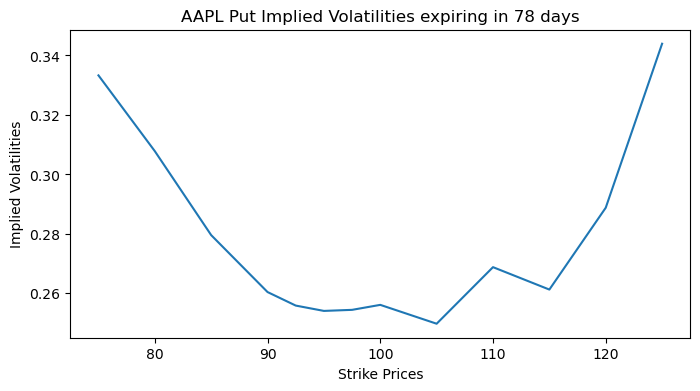

In [29]:
_, ax = plt.subplots(figsize=(8, 4))

ax.plot(strikes, impvols_put)
ax.set(
    xlabel="Strike Prices",
    ylabel="Implied Volatilities",
    title="AAPL Put Implied Volatilities expiring in 78 days",
)